<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [1]:
# Import Libraries (pandas, numpy, matplotlib)

# ....
# ...
# ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________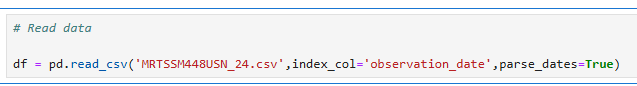

In [3]:
df = pd.read_csv('MRTSSM448USN_24.csv',index_col='observation_date',parse_dates=True)

In [ ]:
#pd.read_csv

In [5]:
# Print the first few rows of data
#d
# ...
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________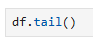

In [7]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [ ]:
# Set name of column as 'Sales'. Use - df.columns 

# ...


In [9]:
df.columns = ['Sales']
df.tail()

,Sales
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________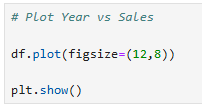

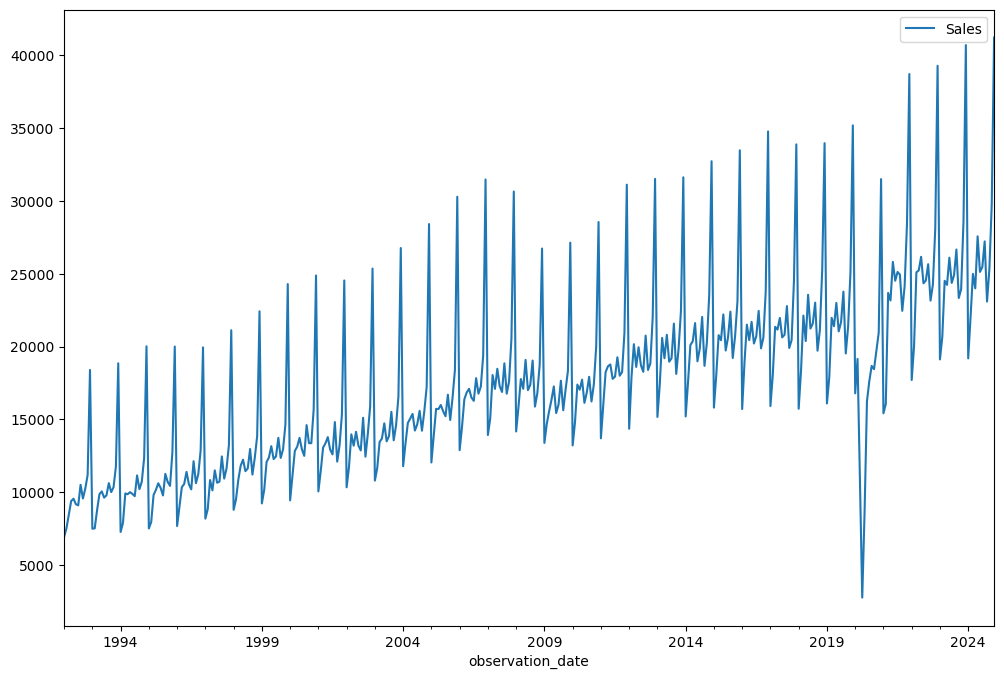

In [11]:
df.plot(figsize=(12,8))
plt.show()

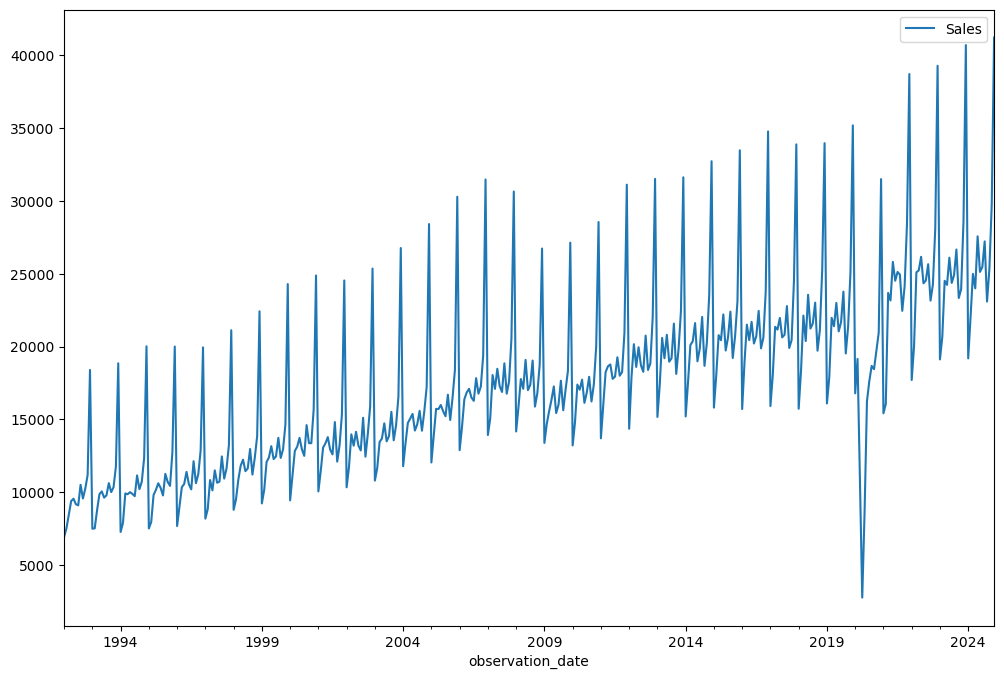

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________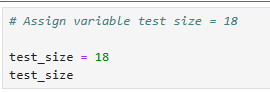

In [13]:
test_size = 18
test_size

18

18

__________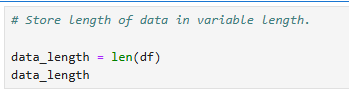

In [15]:
data_length = len(df)
data_length

396

396

__________________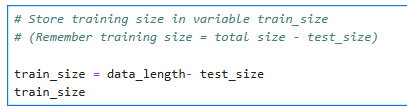

In [17]:
train_size = data_length- test_size
train_size

378

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________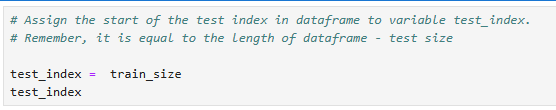

In [19]:
test_index = train_size
test_index

378

378

Next, we will separate train and test datasets.

_________________________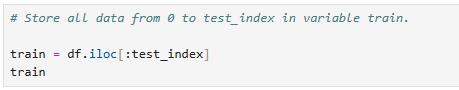

In [21]:
train = df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [23]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc

# ...
# ...
df.iloc

In [25]:
test = df.iloc[test_index:]

In [57]:
# Print the size of the train data

# ...

# Print the size of the test data

# ...

print(f"Train data size: {train.size}, Test data size: {test.size}")




Train data size: 378, Test data size: 18


378
18


### In Neural Networks, we need to Scale Data between 0-1

___________________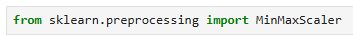

In [27]:
from sklearn.preprocessing import MinMaxScaler

_______________________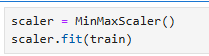

In [29]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

MinMaxScaler()

__________________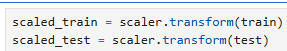

In [31]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
# Check if the data has been scaled properly
# Print max and min for train and test

# ...
# ...
# ...
# ...
print(scaled_train.max())
print(scaled_test.max ())
print(scaled_train.min())
print(scaled_test.min())


1.0
1.0530599939704552
0.0
0.44980403979499545


1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________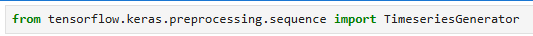

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
#TimeseriesGenerator?

_________________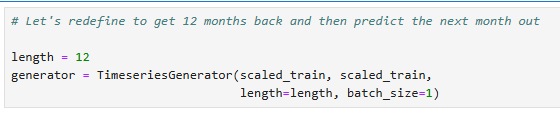

In [36]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)

_______________________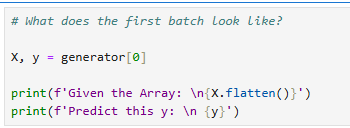

In [39]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
predict this y: 
 [[0.12952558]]


Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________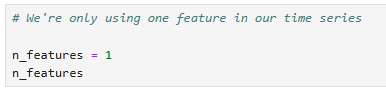

In [43]:
n_features = 1
n_features

1

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [45]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
 
# .....
# .....
# .....
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Your code to create your own model
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))  # SimpleRNN or LSTM/GRU
model.add(Dense(1))  # Since it's a regression task


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

_____________________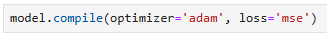

In [49]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [51]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=1)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience= 6)
LAST_DIGIT_IN_YOUR_SID = 6

_____________________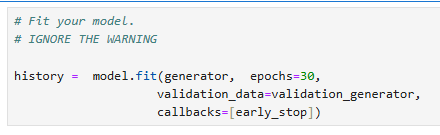

In [57]:
history = model.fit(generator, epochs=30, validation_data=validation_generator, callbacks=[early_stop])


Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0196 - val_loss: 0.0426
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - val_loss: 0.0759
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0165 - val_loss: 4.9684e-04
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 7.0196e-04
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0224


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0364 - val_loss: 0.0283
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0124 - val_loss: 0.0153
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0047 - val_loss: 0.0127
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 6.1039e-04
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0049 - val_loss: 6.4973e-04
Epoch 12/30
366/366 ━━━━━━━━━━━━

_____________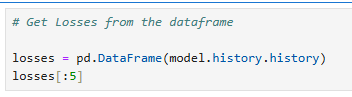

In [59]:
losses = pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.016366,0.042583
1,0.015779,0.075883
2,0.010774,0.000497
3,0.004381,0.001125
4,0.003820,0.001302


In [124]:
# the values may be different


,loss,val_loss
0,0.020090,0.028262
1,0.012648,0.015266
2,0.010198,0.001036
3,0.006880,0.003225
4,0.005237,0.012703


___________________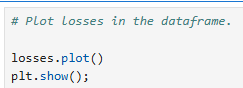

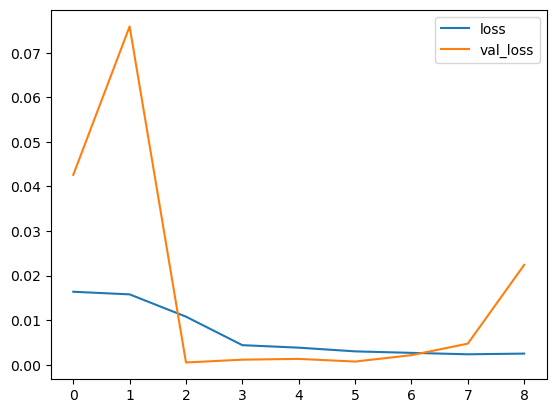

In [61]:
losses.plot()
plt.show();

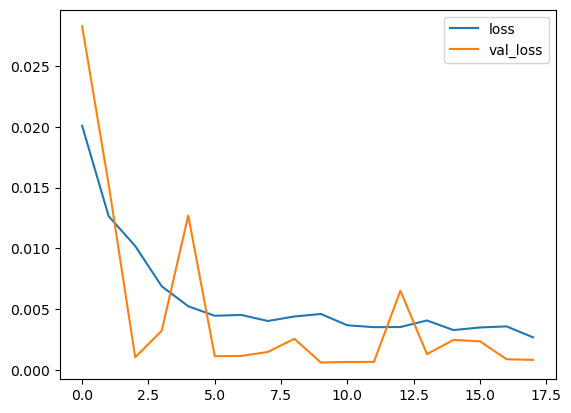

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

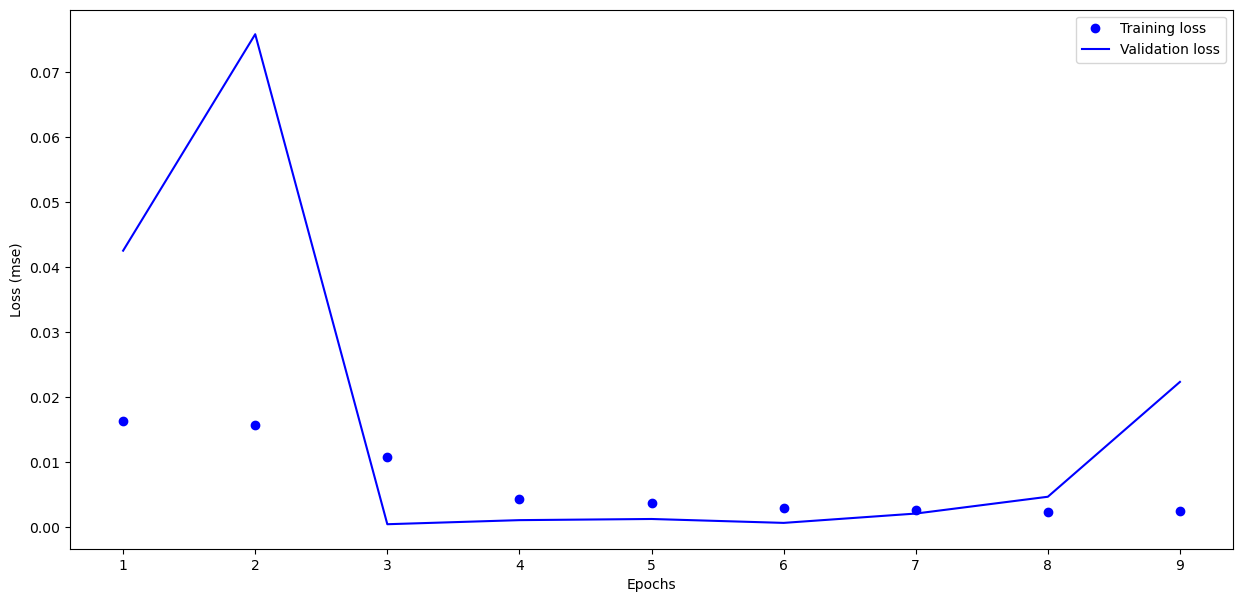

In [63]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________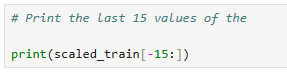

In [65]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________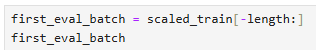

In [67]:
first_eval_batch = scaled_train[-length:]

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [69]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________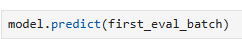

In [71]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.7017895]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


array([[0.63285655]], dtype=float32)

_________________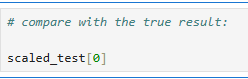

In [73]:
scaled_test[0]

array([0.60665442])

#### 
Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [75]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [77]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [79]:
test_predictions

[array([0.7017895], dtype=float32),
 array([0.85794127], dtype=float32),
 array([0.79487854], dtype=float32),
 array([0.8174193], dtype=float32),
 array([0.96255666], dtype=float32),
 array([1.4680437], dtype=float32),
 array([0.8485929], dtype=float32),
 array([0.75506413], dtype=float32),
 array([0.8731648], dtype=float32),
 array([0.84463376], dtype=float32),
 array([0.9457302], dtype=float32),
 array([0.88118845], dtype=float32),
 array([0.91230047], dtype=float32),
 array([1.1558392], dtype=float32),
 array([1.1479846], dtype=float32),
 array([1.1608568], dtype=float32),
 array([1.3244771], dtype=float32),
 array([1.968783], dtype=float32)]

### Inverse Transformations and Compare

_________________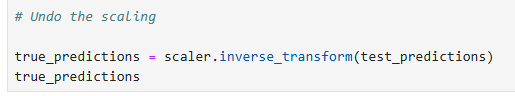

In [81]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[28382.19342554],
       [34079.70311391],
       [31778.7333774 ],
       [32601.17765403],
       [37896.80485982],
       [56340.50993311],
       [33738.60831726],
       [30326.02490509],
       [34635.16307199],
       [33594.15193063],
       [37282.85814857],
       [34927.92305702],
       [36063.10715735],
       [44949.10506511],
       [44662.51497257],
       [45132.18363035],
       [51102.19509137],
       [74610.98608625]])

_____________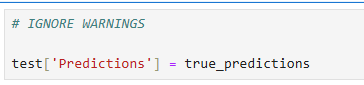

In [83]:
test['predictions'] = true_predictions

/var/folders/s4/l2_rp6rx2m75gf8fmh6dtl280000gn/T/ipykernel_46206/349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


C:\Users\vital\AppData\Local\Temp\ipykernel_18288\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


### Check and plot predictions

In [85]:
# Print the test variable

# ...
print(test)


                  Sales   predictions
observation_date                     
2023-07-01        24911  28382.193426
2023-08-01        26657  34079.703114
2023-09-01        23332  31778.733377
2023-10-01        23933  32601.177654
2023-11-01        28580  37896.804860
2023-12-01        40684  56340.509933
2024-01-01        19188  33738.608317
2024-02-01        22005  30326.024905
2024-03-01        24986  34635.163072
2024-04-01        23993  33594.151931
2024-05-01        27562  37282.858149
2024-06-01        25121  34927.923057
2024-07-01        25453  36063.107157
2024-08-01        27215  44949.105065
2024-09-01        23088  44662.514973
2024-10-01        25318  45132.183630
2024-11-01        29762  51102.195091
2024-12-01        41199  74610.986086


_______________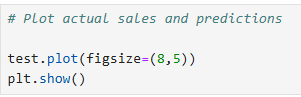

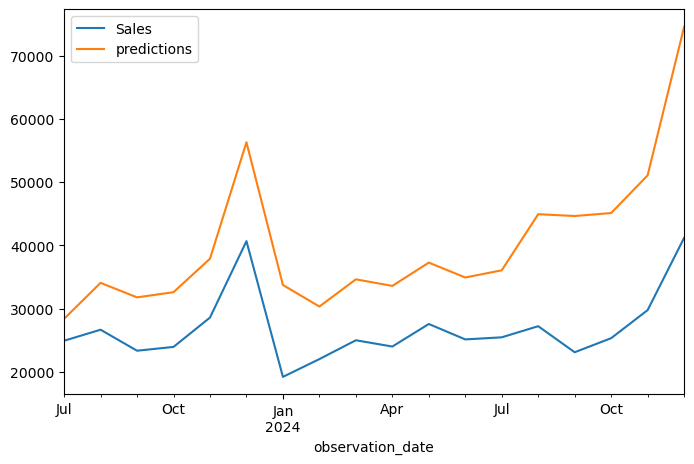

In [87]:
test.plot(figsize=(8,5))
plt.show()

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [89]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [91]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [93]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [95]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model

# ...
# ...
# ...
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [97]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# your code to compile the model

# ...
model.compile(optimizer='adam', loss='mean_squared_error')


In [101]:
model.compile(optimizer='adam', loss='mse')

In [103]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 6

early_stop = EarlyStopping(monitor='val_loss',patience=6)


____________________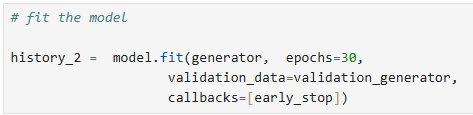

In [105]:
history_2 = model.fit(generator, epochs=30,
validation_data=validation _generator, callbacks=[early_stop])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (323902539.py, line 2)

In [107]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0313 - val_loss: 0.0143
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 8.5202e-04
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 9.0708e-04
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 12/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

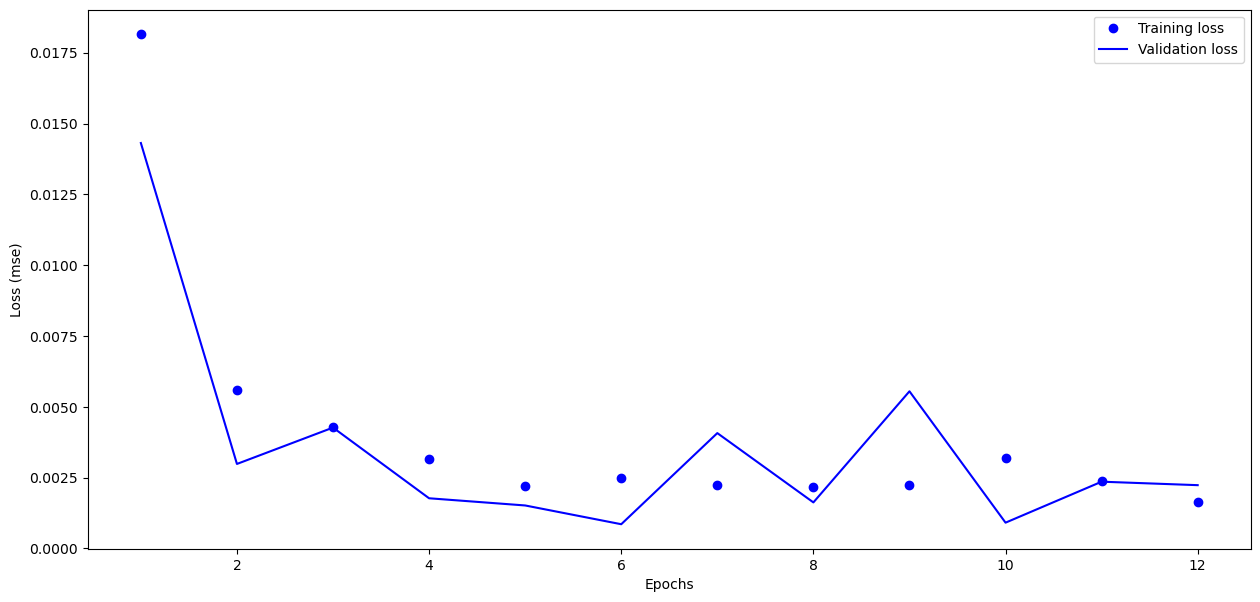

In [109]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [227]:
# You can use the code created above to type the next cell code

_________________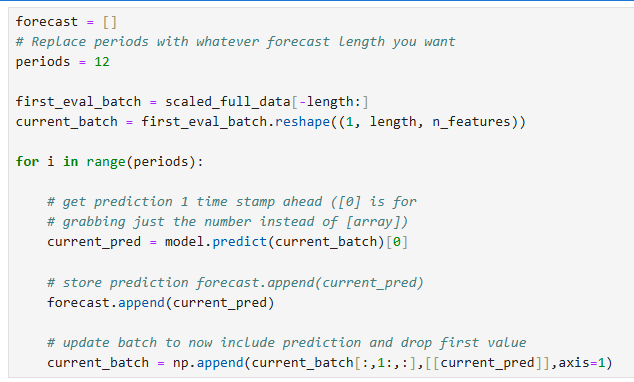

In [111]:
forecast = []  # Define forecast as an empty list
periods = 12
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # Store prediction
    forecast.append(current_pred)
    
    # Update batch to now include prediction and drop the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


______________________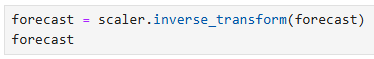

In [113]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[21865.5190509 ],
       [21618.17530304],
       [23889.49823856],
       [22360.21524578],
       [23673.08442056],
       [23820.21580464],
       [23384.67837447],
       [24048.78455007],
       [22788.12349623],
       [22942.55349123],
       [25044.71872222],
       [33695.23856187]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [115]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [117]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [119]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [121]:
forecast_df

,Forecast
2025-01-01,21865.519051
2025-02-01,21618.175303
2025-03-01,23889.498239
2025-04-01,22360.215246
2025-05-01,23673.084421
2025-06-01,23820.215805
2025-07-01,23384.678374
2025-08-01,24048.784550
2025-09-01,22788.123496
2025-10-01,22942.553491


__________________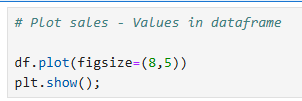

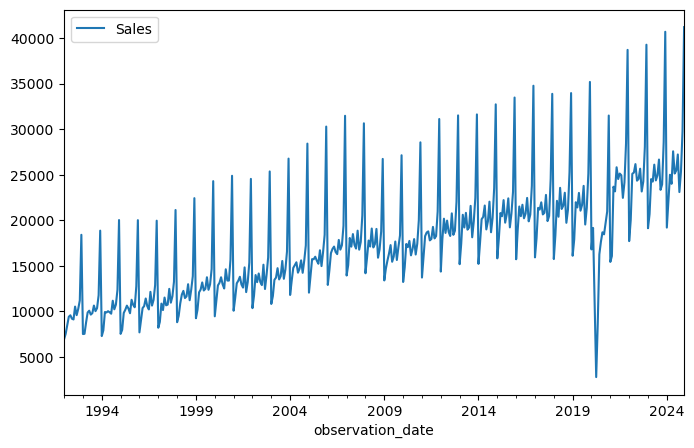

In [123]:
df.plot(figsize=(8,5))
plt.show();

____________________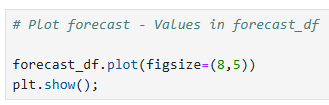

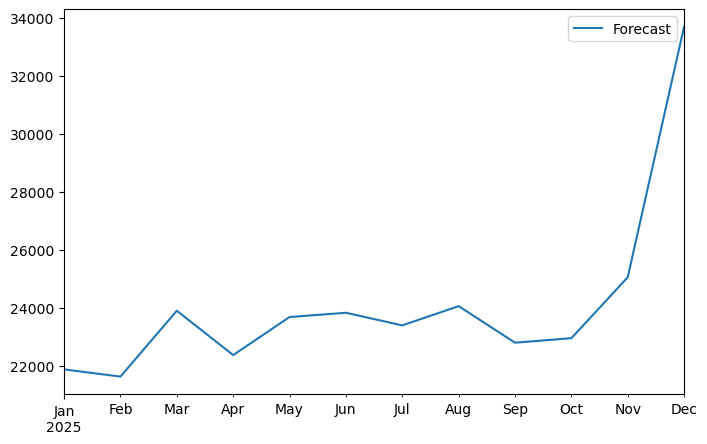

In [125]:
forecast_df.plot(figsize=(8,5))
plt.show();

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________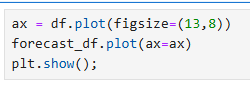

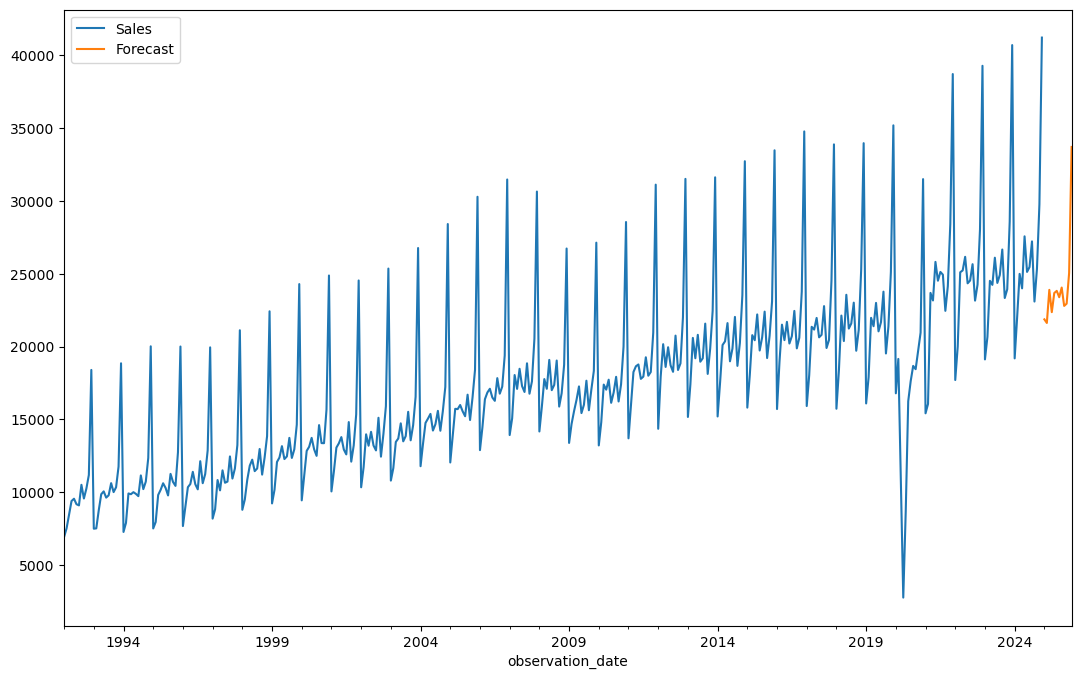

In [127]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show();

_______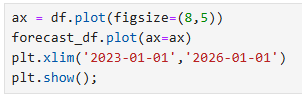

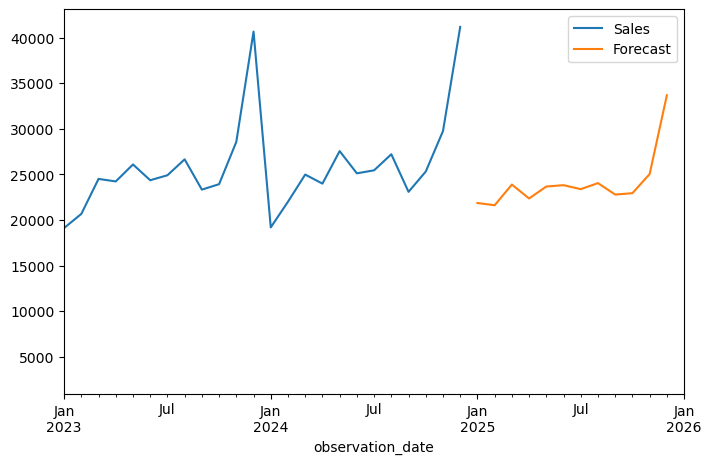

In [129]:
ax = df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01','2026-01-01')
plt.show();

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [131]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [133]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

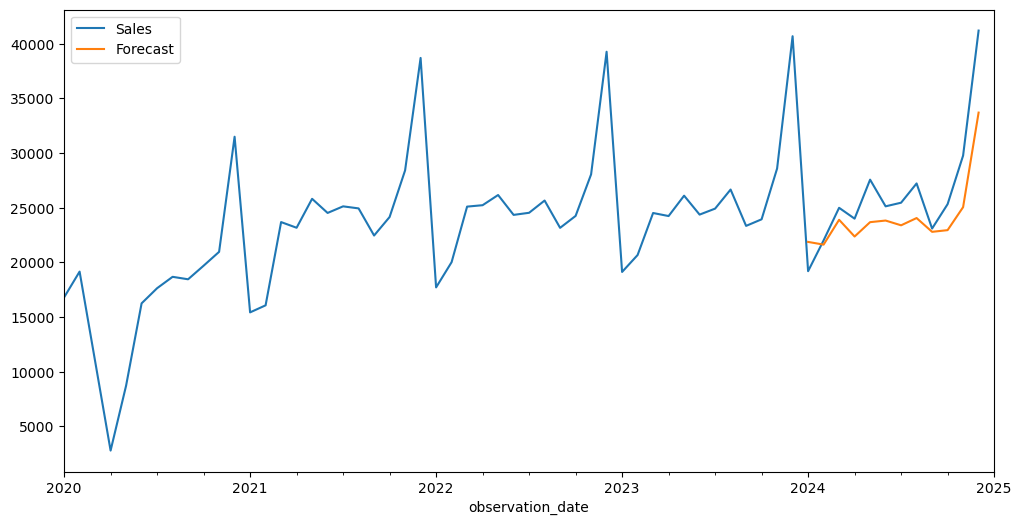

In [135]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!